In [1]:
%run ../../utils/commonImports.py
%matplotlib inline

In [2]:
data_root = "D:\\Dropbox\\My work\\krypl-project\\dataSplit\\02-sg-filter"
gs_path = "D:\\Dropbox\\My work\\krypl-project\\models\\02-sg-filter\\tree_search.pkl"

# Grid search evaluation

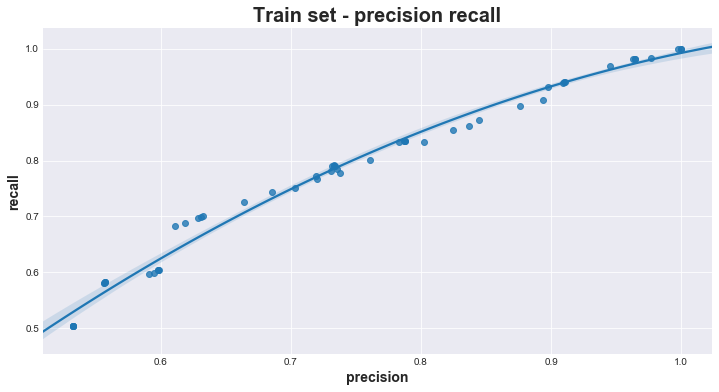

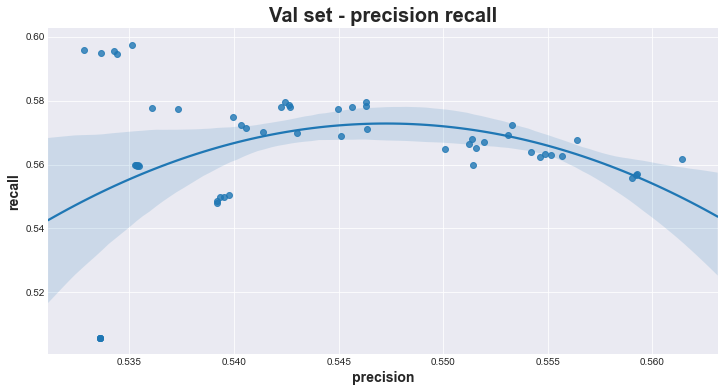

In [3]:
from utils.evaluation import gs_report

grid_search, stats_val = gs_report(data_root, gs_path)

# Model selection

In [4]:
stats_val.sort_values('precision', ascending=False).head(10)

,precision,recall,f1
35,0.5614,0.5618,0.5616
45,0.5593,0.5570,0.5581
50,0.5592,0.5567,0.5580
40,0.5590,0.5557,0.5574
36,0.5564,0.5676,0.5619
30,0.5557,0.5626,0.5591
46,0.5551,0.5629,0.5590
51,0.5549,0.5632,0.5590
41,0.5546,0.5625,0.5585
31,0.5542,0.5640,0.5590


In [40]:
from utils.evaluation import clf_report

clf = grid_search.clfs[35]
threshold_model = ThresholdModel(clf, 0.6)
clf = threshold_model
clf_report(clf, data_root)

## Train data

,predicted_0,predicted_1
true_0,36889,527
true_1,761,31112


Precision: 0.983
Recall: 0.976



## Validation data

,predicted_0,predicted_1
true_0,10157,5891
true_1,6069,7579


Precision: 0.563
Recall: 0.555



## Test data

,predicted_0,predicted_1
true_0,14200,8634
true_1,8785,10804


Precision: 0.556
Recall: 0.552



# Look at probabilities

In [37]:
import pandas as pd

class ThresholdModel:
    def __init__(self, clf, threshold_1=0.5):
        self.clf = clf
        self.threshold_1 = threshold_1
        
    def predict(self, X):
        probabs = pd.Series(self.clf.predict_proba(X)[:, 1])
        labels = probabs > self.threshold_1
        return labels.apply(int)

In [15]:
X_train, y_train, X_val, y_val, X_test, y_test = load_split('D:\\Dropbox\\My work\\krypl-project\\dataSplit\\02-sg-filter')

In [38]:
threshold_model = ThresholdModel(clf, 0.6)

In [39]:
threshold_model.predict(X_train)

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        1
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       1
24       0
25       0
26       0
27       0
28       1
29       0
        ..
69259    0
69260    0
69261    0
69262    0
69263    0
69264    0
69265    0
69266    1
69267    0
69268    0
69269    0
69270    1
69271    1
69272    1
69273    1
69274    1
69275    0
69276    0
69277    0
69278    0
69279    0
69280    0
69281    0
69282    0
69283    0
69284    0
69285    0
69286    0
69287    1
69288    0
Length: 69289, dtype: int64

C:\Anaconda3\envs\crypto36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


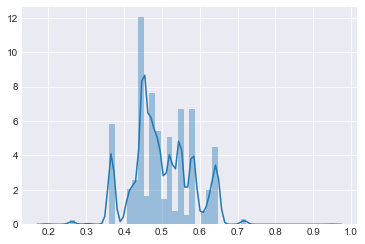

In [22]:
sns.distplot(probabs_train)